<a href="https://colab.research.google.com/github/NinaAbeyratne/Snaky---Snake-Identification-System/blob/Nina/Testing_of_VGG_19_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from keras.preprocessing import image
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the VGG16 model
model_path = '/content/drive/My Drive/DSGP Group 24/Dataset/Component 1/Model/SnakeModel_VGG-19.h5'
model = load_model(model_path)

In [4]:
# Directory containing testing images
test_dir = '/content/drive/My Drive/DSGP Group 24/Dataset/Component 1/Model_Data/Test/'
imageCategory = ["no", "yes"]

In [5]:
# Function to read the images and append them to arrays containing images and labels
def image_label():
    images = []
    labels = []
    for image in imageCategory:
        # path
        label_path = os.path.join(test_dir, image)
        # feeding 0 for no and 1 for yes
        label = imageCategory.index(image)
        # label
        for file in os.listdir(label_path):
            images.append(os.path.join(label_path, file))
            labels.append(imageCategory[label])
    return images, labels

In [6]:
# Get test images and labels
test_images, test_labels = image_label()

# Convert labels to numerical format
true_labels = [imageCategory.index(label) for label in test_labels]

In [7]:
# Predicted labels for the images
predicted_labels = []
for test_image in test_images:
    img = image.load_img(test_image, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    prediction = model.predict(img_array)
    predicted_labels.append(np.argmax(prediction))

1/1 [==============================] - 0s 20ms/step


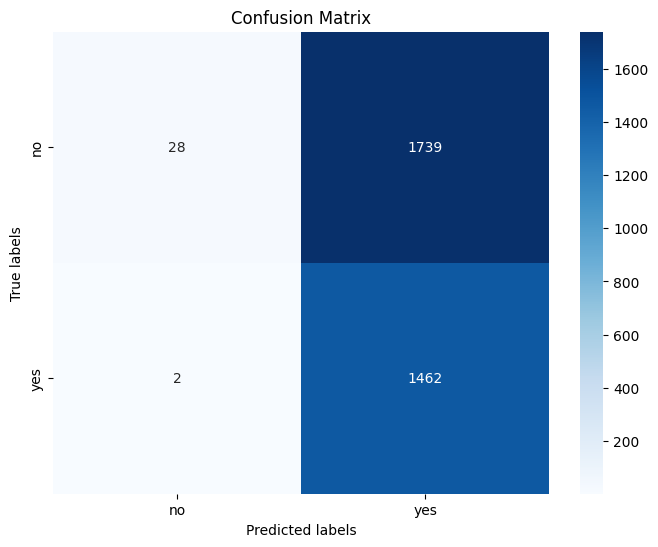

In [8]:
# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=imageCategory)
print(class_report)

              precision    recall  f1-score   support

          no       0.93      0.02      0.03      1767
         yes       0.46      1.00      0.63      1464

    accuracy                           0.46      3231
   macro avg       0.70      0.51      0.33      3231
weighted avg       0.72      0.46      0.30      3231

